# Part I - Ford GoBike Dataset Exploration  
## by Osama Ahmed  

## Introduction
The **Ford GoBike** dataset contains information on a bike-sharing system in the San Francisco Bay Area. It includes details on individual trips taken by users, such as trip duration, start and end stations, user types, and more.  


### Key Questions:  
In this analysis, I aim to explore the following questions:  

1. **What are the most common trip durations?**  
2. **How does trip duration vary by user type (Subscriber vs. Customer)?**  
3. **What are the peak hours for bike usage?**  
4. **How does bike usage differ across weekdays and weekends?**  
5. **Are there patterns in trip duration based on gender?**  


## Preliminary Wrangling

In [2]:
# Importing all the necessary libraries and setting plots to be inline
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the Ford Gobike dataset
df=pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
# Printing the first 5 rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Getting some info about numerical columns in the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# Getting info about every column in the dataset such as datatype, name and Non-Null count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Getting the shape of the dataset (number of rows and columns).
df.shape

(183412, 16)

### **The structure of the dataset.**
1. The dataset consists of 183,412 rows and 16 columns.
2. The columns provide information about bike rides like:
    - **Duration of the trip** (`duration_sec`).
    - **Start and end times** (`start_time`, `end_time`).
    - **Station details** (e.g., `start_station_id`, `end_station_name`, `latitude`, and `longitude`).
    - **User details** (e.g., `user_type`, `member_birth_year`, `member_gender`).
    - **Bike details** (e.g., `bike_id`, `bike_share_for_all_trip`).

3. Some columns contain missing values, such as `member_birth_year`, `member_gender`, `start_station_id`, and `end_station_id`.
4. Some columns have inappropriate data types that need correction. For example:
    - `member_birth_year` should be an integer instead of a float.
    - `start_station_id` and `end_station_id` should be strings or integers instead of floats.

### **The main feature(s) of interest in the dataset.**
#### The primary features of interest in this dataset are:
1. **Trip duration** (`duration_sec`): To analyze the length of bike rides and identify patterns in usage.
2. **User type** (`user_type`): To compare the behavior and preferences of subscribers versus casual customers.
3. **Member demographics** (`member_birth_year`, `member_gender`): To understand the age and gender distribution of users and their impact on bike usage.
4. **Station usage** (`start_station_id`, `end_station_id`): To identify popular stations and frequently traveled routes.
5. **Bike-sharing program** (`bike_share_for_all_trip`): To evaluate the adoption and usage of the bike-sharing program.

### **The features in the dataset that will help support the investigation into the feature(s) of interest.**
1. **Trip duration**:
    - `duration_sec`: To measure the length of each trip.
    - `start_time` and `end_time`: To calculate trip duration and analyze temporal trends (e.g., peak hours, seasonal variations).
2. **User type**:
    - `user_type`: To differentiate between subscribers and casual users and compare their usage patterns.
3. **Member demographics**:
    - `member_birth_year`: To derive user age and analyze age-related trends in bike usage.
    - `member_gender`: To explore gender-based differences in bike usage.
4. **Station usage**:
    - `start_station_id`, `end_station_id`, `start_station_name`, `end_station_name`: To identify the most frequently used stations and popular routes.
    - `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`: To map station locations and analyze geographic trends.
5. **Bike-sharing program**:
    - `bike_share_for_all_trip`: To assess the adoption and usage of the bike-sharing program.

## Data Cleaning

#### 1. Handling Missing Values

In [8]:
# Checking which columns have missing data and how many.
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Dropping the rows with Nan type values in start_station_id or end_station_id columns
df.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)

In [10]:
# Filling the entries with Nan type values in member_birth_year columns with the median birth year
median_birth_year = df['member_birth_year'].median()
df['member_birth_year'].fillna(median_birth_year, inplace=True)

In [11]:
# Filling the entries with Nan type values in member_gender columns with the value "Other"
df['member_gender'].fillna('Other', inplace=True)

In [12]:
# Count the number of occurrences where 'member_gender' is 'Other'
occurrences = int((df['member_gender'] == 'Other').sum())
# Initialize a counter to track replacements
counter = 0
# Loop through all rows in the DataFrame
for i in range(df.shape[0]):  
    # Check if the current row has 'Other' in the 'member_gender' column
    if df['member_gender'].iloc[i] == 'Other':  
        # Assign 'Male' to the first half and 'Female' to the second half
        if counter <= int(occurrences / 2):  
            df['member_gender'].iloc[i] = 'Male'  
        else:  
            df['member_gender'].iloc[i] = 'Female'  
        # Increment the counter after each replacement
        counter += 1  

C:\Users\zekob\AppData\Local\Temp\ipykernel_1136\79812038.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['member_gender'].iloc[i] = 'Male'
C:\Users\zekob\AppData\Local\Temp\ipykernel_1136\79812038.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['member_gender'].iloc[i] = 'Female'


In [13]:
# Checking whether the changes are done or not
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [14]:
# Checking whether the changes are done or not
df['member_gender'].value_counts()

Male      136456
Female     46759
Name: member_gender, dtype: int64

#### 2. Fixing Data Types

In [15]:
# Converting member_birth_year to integer
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [16]:
# Converting start_station_id , end_station_id and bike_id to strings
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [17]:
# Converting start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#### 3. Removing Duplicates

In [18]:
# Checking for duplicates
df.duplicated().sum()

0

#### 4. Feature Engineering

In [19]:
# Calculating user age from member_birth_year column
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['member_birth_year']

In [20]:
# Extract hour from start_time
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

In [21]:
# Extract day of week from start_time
df['start_day_of_week'] = pd.to_datetime(df['start_time']).dt.day_name()

#### 5. Removing Outliers

In [22]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the 'age' column
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
# Compute the interquartile range (IQR)
IQR_age = Q3_age - Q1_age
# Define the lower and upper bounds for outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
# Filter the DataFrame to keep only values within the defined bounds
df = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

In [23]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the 'duration_sec' column
Q1_dur = df['duration_sec'].quantile(0.25)
Q3_dur = df['duration_sec'].quantile(0.75)
# Compute the interquartile range (IQR)
IQR_dur = Q3_dur - Q1_dur
# Define the lower and upper bounds for outliers
lower_bound_dur = Q1_dur - 1.5 * IQR_dur
upper_bound_dur = Q3_dur + 1.5 * IQR_dur
# Filter the DataFrame to keep only values within the defined bounds
df = df[(df['duration_sec'] >= lower_bound_dur) & (df['duration_sec'] <= upper_bound_dur)]

#### 6. Validating the Cleaned Data

In [24]:
# Checking data types and missing values
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164648 entries, 6 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             164648 non-null  int64         
 1   start_time               164648 non-null  datetime64[ns]
 2   end_time                 164648 non-null  datetime64[ns]
 3   start_station_id         164648 non-null  object        
 4   start_station_name       164648 non-null  object        
 5   start_station_latitude   164648 non-null  float64       
 6   start_station_longitude  164648 non-null  float64       
 7   end_station_id           164648 non-null  object        
 8   end_station_name         164648 non-null  object        
 9   end_station_latitude     164648 non-null  float64       
 10  end_station_longitude    164648 non-null  float64       
 11  bike_id                  164648 non-null  object        
 12  user_type       

In [25]:
# Getting a summary statistics for numerical columns
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,start_hour
count,164648.000000,164648.000000,164648.000000,164648.000000,164648.000000,164648.000000,164648.000000,164648.000000
mean,551.924299,37.770838,-122.351845,37.771015,-122.351309,1986.286332,38.713668,13.456070
std,304.518513,0.100719,0.117963,0.100621,0.117470,7.754020,7.754020,4.770309
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1965.000000,24.000000,0.000000
25%,315.000000,37.770083,-122.411901,37.770407,-122.411403,1982.000000,33.000000,9.000000
50%,490.000000,37.780526,-122.398279,37.780760,-122.397437,1987.000000,38.000000,14.000000
75%,732.000000,37.797280,-122.283093,37.797280,-122.286533,1992.000000,43.000000,17.000000
max,1492.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,60.000000,23.000000


In [26]:
# Saving the cleaned dataset to a new file
df.to_csv('cleaned_ford_gobike.csv', index=False)

## Data Exploration and Visualization

### **Univariate Exploration**

#### **1. What are the most common trip durations?**

In [48]:
# Function to display a plot with a title and axis labels
def shape_show(title, x_label, y_label):
    """
    Displays a plot with a given title and axis labels.
    
    Parameters:
    - title (str): The title of the plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    """
    plt.title(title)  # Set the plot title
    plt.xlabel(x_label)  # Set the x-axis label
    plt.ylabel(y_label)  # Set the y-axis label
    # plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

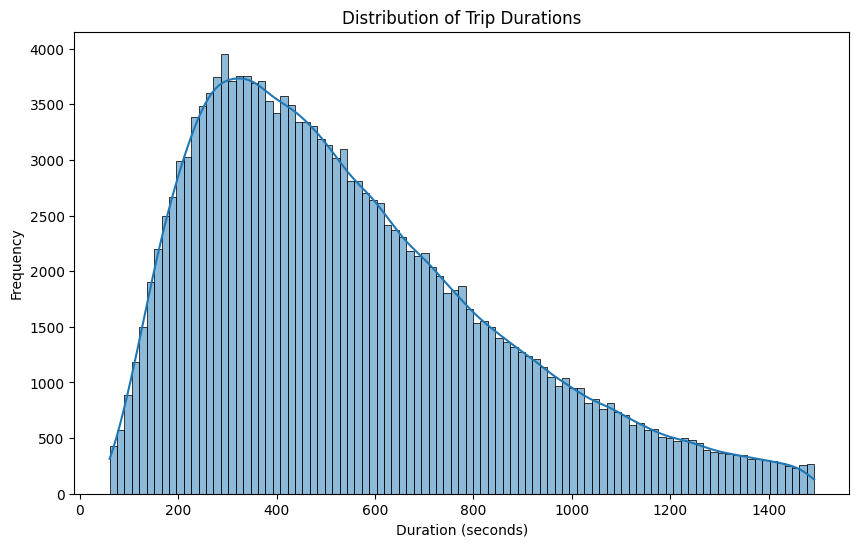

In [49]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a histogram with a kernel density estimate (KDE) to show distribution
sns.histplot(df['duration_sec'], kde=True)
# Add title and axis labels
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
# Display the plot
plt.show()

#### **Observations**
- The distribution of trip durations is right-skewed, meaning most trips are shorter in duration, with fewer trips having longer durations.
- The highest frequency of trips occurs at durations between 0 and 500 seconds. This suggests that most users take relatively short trips.
- There are a few trips with durations extending beyond 1200 seconds, but these are much less frequent. These could represent outliers or special cases (e.g., long leisure rides).
- The data suggests that the bike-sharing system is primarily used for short commutes or quick trips, rather than long rides.

#### **2. What are the peak hours for bike usage?**

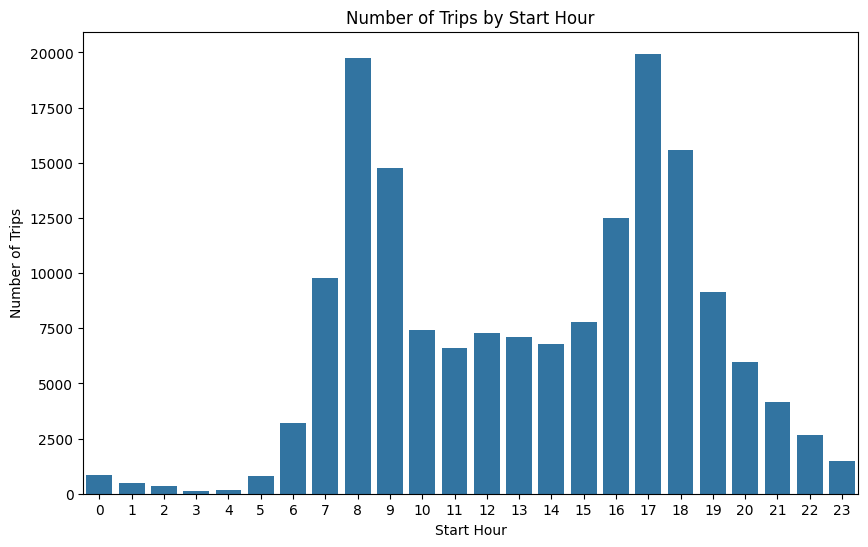

In [50]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a count plot to show the number of trips for each start hour
sns.countplot(data=df, x='start_hour')
# Display the plot with title and axis labels
shape_show('Number of Trips by Start Hour','Start Hour','Number of Trips')

#### **Observations**
- The highest number of trips occur during morning (7–9 AM) and evening (4–6 PM) hours. These peaks likely correspond to commuting times, when people are traveling to and from work or school.
- The lowest number of trips occur during late-night and early-morning hours (12 AM–5 AM). This is expected, as fewer people use bikes during these times.
- There is a moderate level of bike usage during midday hours (10 AM–3 PM), which could be due to errands, leisure rides, or lunchtime trips.
- The bike-sharing system is heavily used for commuting purposes, as evidenced by the morning and evening peaks.


#### **3. How does bike usage differ across weekdays and weekends?**

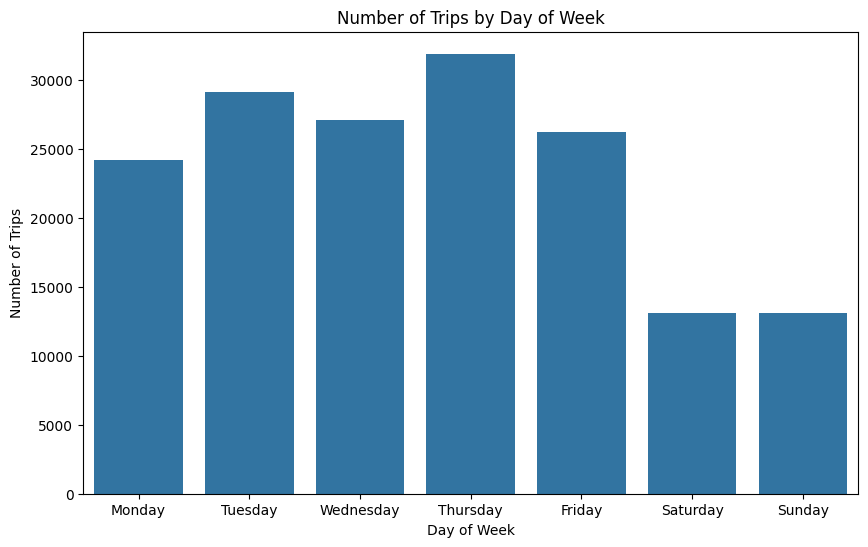

In [51]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a count plot to show the number of trips for each day of the week
# The 'order' parameter ensures the days are displayed in the correct sequence
sns.countplot(data=df, x='start_day_of_week',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Display the plot with title and axis labels+
shape_show('Number of Trips by Day of Week','Day of Week','Number of Trips')

#### **Observations**
- Weekdays (Monday–Friday) have significantly higher bike usage compared to weekends (Saturday and Sunday). This suggests that the bikes are primarily used for commuting to work or school.
- Among weekdays, Tuesday, Wednesday, and Thursday show the highest number of trips, indicating consistent usage during the middle of the workweek.
- The bike-sharing system is heavily utilized for work-related commuting, with lower usage on weekends.
- To increase weekend usage, the service could promote leisure rides or offer weekend-specific incentives.

### **Bivariate Exploration**

#### **4. How does trip duration vary by user type (Subscriber vs. Customer)?**

C:\Users\zekob\AppData\Local\Temp\ipykernel_1136\2012506413.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_type', y='duration_sec', palette='Set2')


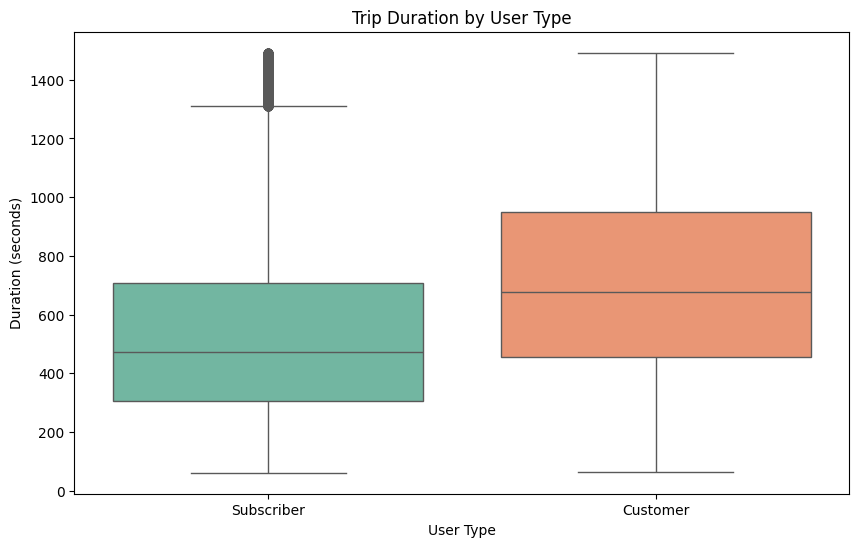

In [52]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a box plot to show the distribution of trip duration for each user type
# 'palette' is used to set distinct colors for better differentiation
sns.boxplot(data=df, x='user_type', y='duration_sec', palette='Set2')
# Display the plot with title and axis labels
shape_show('Trip Duration by User Type','User Type','Duration (seconds)')

#### **Observations**
- **Customers** tend to have longer trip durations compared to **Subscribers**. This is evident from the higher median and wider spread of the box plot for Customers.
- Subscribers have shorter and more consistent trip durations, suggesting they may use the bikes for regular, predictable commutes.
- The median trip duration for Subscribers is lower than Customers.
- The difference in trip durations suggests that Subscribers are more likely to be regular users with specific routines, while Customers may be occasional users with more varied trip purposes.

#### **5. Are there patterns in trip duration based on gender?**

C:\Users\zekob\AppData\Local\Temp\ipykernel_1136\1953442213.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_gender', y='duration_sec', palette='Set3')


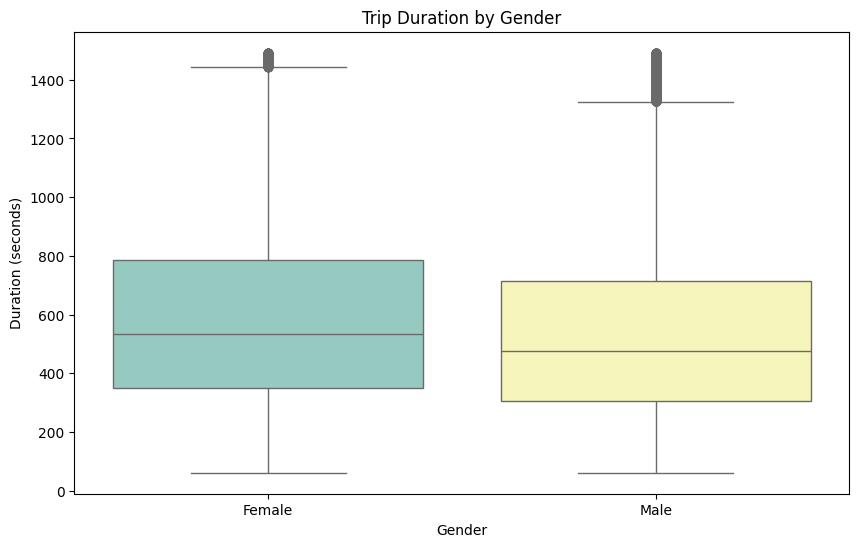

In [53]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a box plot to show the distribution of trip duration for each gender
# 'palette' is used to set distinct colors for better differentiation
sns.boxplot(data=df, x='member_gender', y='duration_sec', palette='Set3')
# Display the plot with title and axis labels
shape_show('Trip Duration by Gender','Gender','Duration (seconds)')

#### **Observations**
- Female users tend to have slightly longer trip durations on average compared to Male users.
- The median trip duration for Male users is around 430 seconds.
- The median trip duration for Female users is slightly higher, around 500 seconds.
- The differences in trip durations by gender could reflect varying usage patterns or preferences. Further analysis could explore whether these differences are influenced by factors like trip purpose or time of day.

#### **6. How does age affect trip duration?**

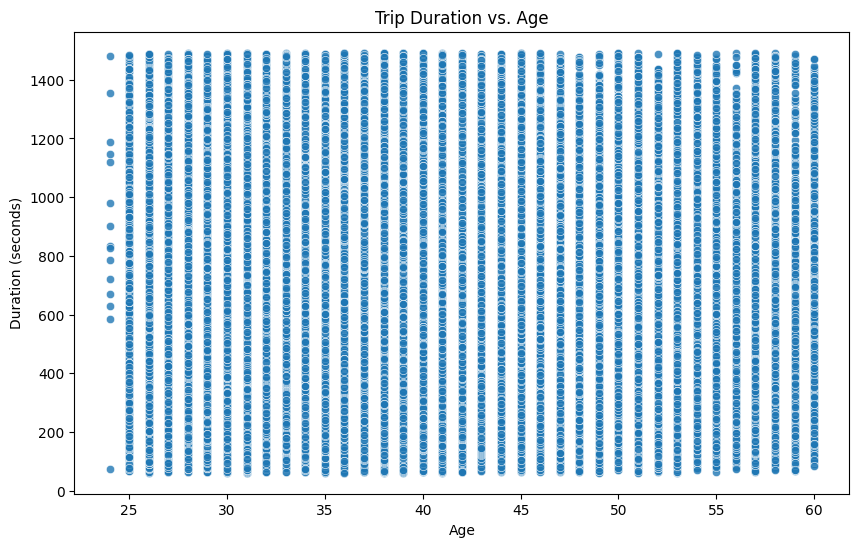

In [54]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a scatter plot to show the relationship between age and trip duration
# 'alpha' is set to 0.8 to reduce overplotting and improve clarity
sns.scatterplot(data=df, x='age', y='duration_sec', alpha=0.8)
# Display the plot with title and axis labels
shape_show('Trip Duration vs. Age','Age','Duration (seconds)')

#### **Observations**
- The majority of trips fall below 1500 seconds, indicating that most users take relatively short trips.
- There is no clear trend showing that older or younger users take significantly longer or shorter trips. The distribution looks fairly even across the different age groups.

#### **7. What are the most common bike routes?**

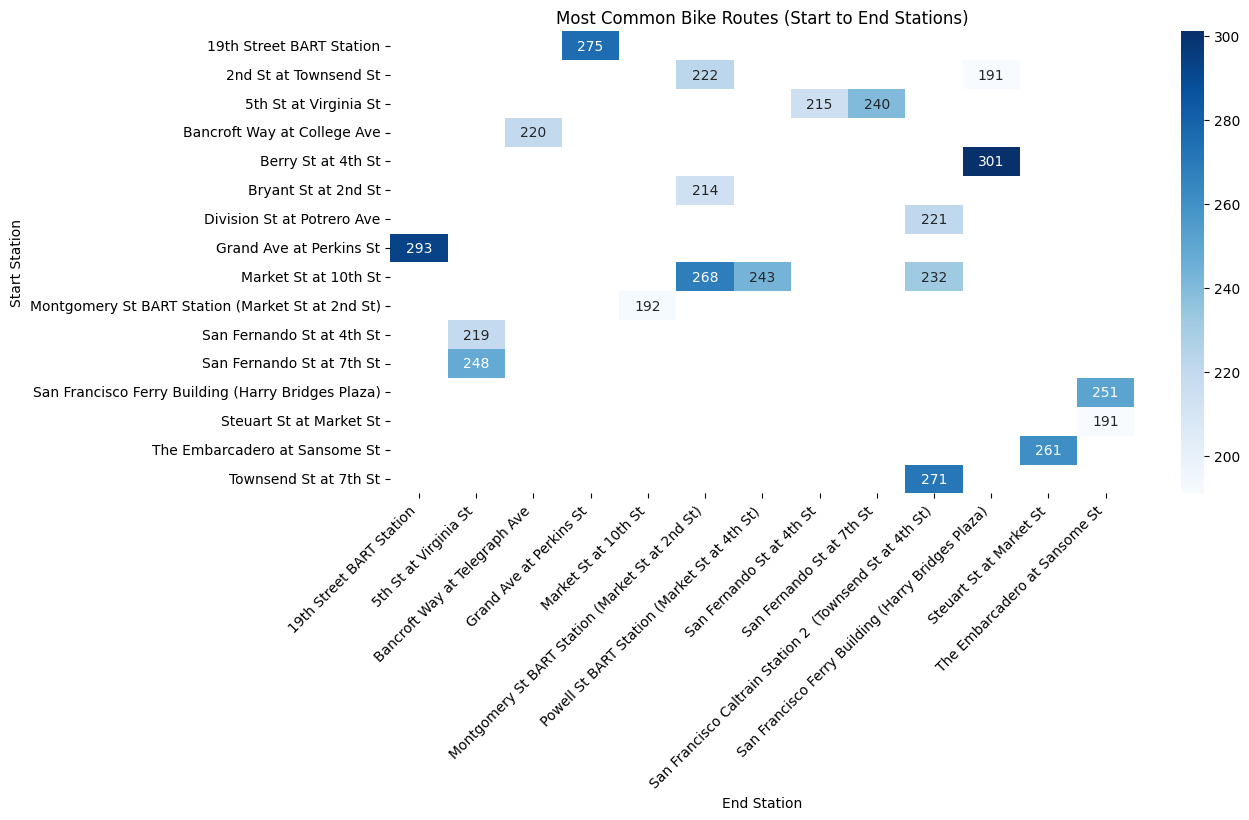

In [55]:
# Group the data by start and end station, counting the number of trips for each route
top_routes = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
# Sort the routes by trip count in descending order and select the top 20 most frequent routes
top_routes = top_routes.sort_values(by='count', ascending=False).head(20)
# Create a pivot table for visualization, setting start stations as rows and end stations as columns
pivot_table = top_routes.pivot(index='start_station_name', columns='end_station_name', values='count')
# Set figure size for better readability
plt.figure(figsize=(12, 6))
# Create a heatmap to visualize the most common routes
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".0f")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
# Display the plot with title and axis labels
shape_show('Most Common Bike Routes (Start to End Stations)','End Station','Start Station')

#### **Observations**
- Certain start-end station pairs have significantly higher trip counts, indicated by the darker blue shades. Notably, routes such as **Berry St at 4th St** → **San Fransico Ferry Building** and **Grand Ave at Perkins St** → **19th Street Bart Station** stand out with the highest trip frequencies, These routes likely connect high-traffic areas such as business hubs, residential zones, or transit points.
- The lightest-colored cells represent routes with lower demand. These could be less convenient connections or areas with fewer regular commuters.
- High-demand routes should have a consistent supply of bikes to ensure availability during peak hours.
- Popular station pairs may indicate areas where improved bike lanes or better connectivity could enhance commuter experiences.

### **Multivariate Exploration**

#### **8. How does trip duration vary by time of day and user type?**

c:\Users\zekob\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


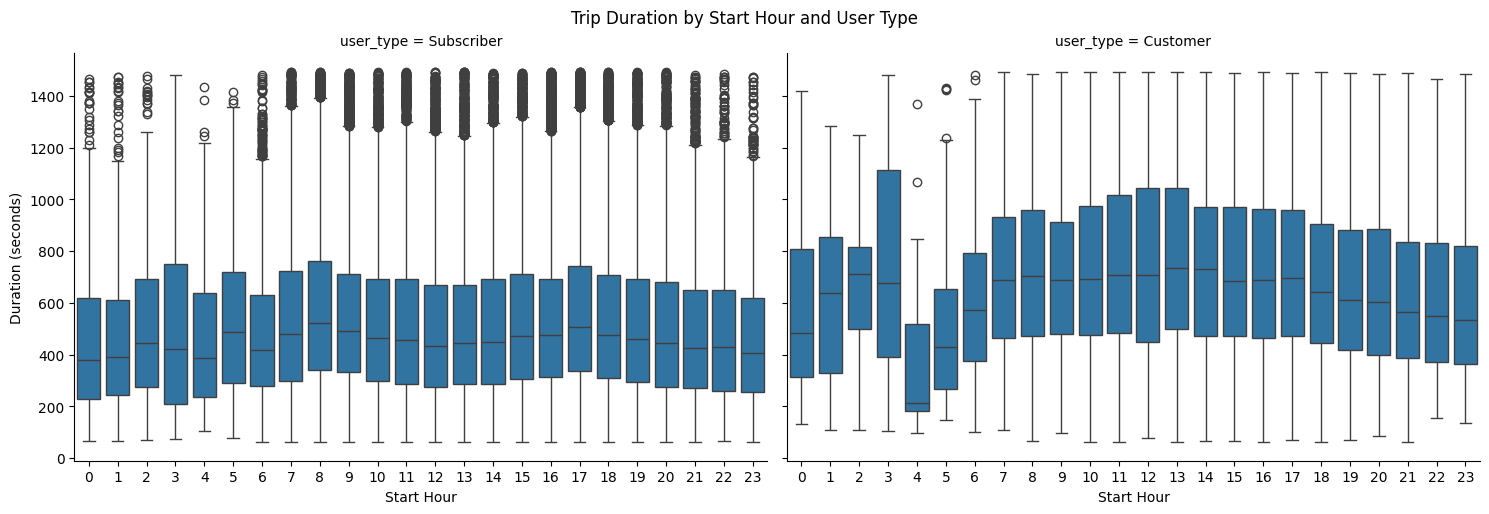

In [34]:
# Create a FacetGrid to plot boxplots of trip duration by start hour for each user type
grid = sns.FacetGrid(data=df, col='user_type', height=5, aspect=1.5)
# Map a boxplot onto the grid, plotting start hour on the x-axis and duration on the y-axis
grid.map(sns.boxplot, 'start_hour', 'duration_sec')
# Set axis labels
grid.set_axis_labels('Start Hour', 'Duration (seconds)')
# Set the overall title for the figure
grid.figure.suptitle('Trip Duration by Start Hour and User Type', y=1.02)
# Display the plot
plt.show()

#### **Observations**
- Customers tend to have longer trip durations on average compared to Subscribers.
- Subscribers have a significantly higher number of outliers, suggesting many trips are of a consistent duration, but some users take exceptionally long trips.
- **Customers**: Trip durations fluctuate throughout the day, with the longest trips occurring in the early morning hours (around 2-4 AM).
- **Subscribers**: Trip durations remain relatively consistent across all hours, with a slight increase during peak commuting hours (morning and evening).
- Subscribers likely use the service for commuting, as their durations are stable across the day.
- Customers might use the service for leisure or tourism, leading to longer and more varied trip durations.

#### **9. How does trip duration vary by age and gender?**

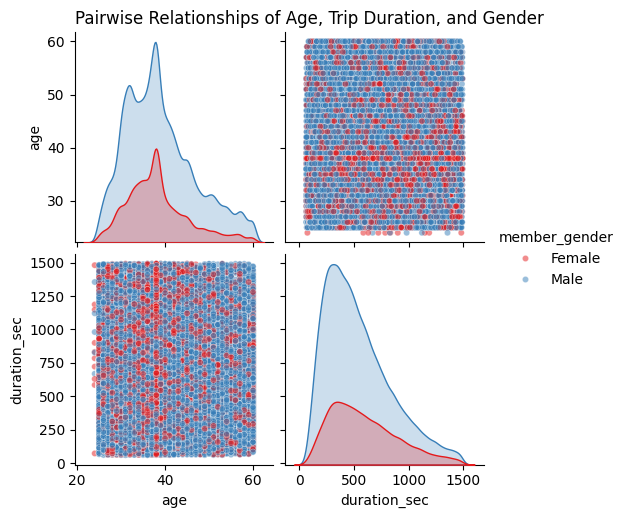

In [35]:
# Select numerical variables for the pairplot
num_vars = ['age', 'duration_sec']
# Create a subset of the dataframe including selected numerical variables and the 'member_gender' column
plot_df = df[num_vars + ['member_gender']]
# Create a pairplot to visualize pairwise relationships between the selected variables
sns.pairplot(
    plot_df, 
    hue='member_gender',  # Differentiate by gender using color
    diag_kind='kde',  # Use kernel density estimation for diagonal plots
    palette='Set1',  # Set color palette
    plot_kws={'alpha': 0.5, 's': 20}  # Adjust transparency and marker size for better visibility
)
# Set the title for the plot
plt.suptitle('Pairwise Relationships of Age, Trip Duration, and Gender', y=1.02)
# Display the plot
plt.show()

#### **Observations**
1. **Age Distribution by Gender**
    - Males (blue) dominate the dataset across all age groups.
    - Both genders have a peak in their 30s, but males have a second peak around their late 40s to early 50s.
    - The distribution for females (red) is smaller in magnitude, meaning there are fewer female users compared to male users. 
2. **Trip Duration vs. Age**
    - There is no strong trend showing that older or younger people take significantly longer trips.
    - The points are densely packed, suggesting a wide range of trip durations for all age groups.
3. **Trip Duration Distribution by Gender**
    - Males take more trips overall, as seen in the distribution density.
    - Both genders follow a similar trip duration pattern, where most trips are relatively short.
    - The distribution is right-skewed, meaning there are some trips with very long durations, but they are relatively rare.

## Summary
1. **Trip Duration Trends:**
   - Most trips are short (under 500 seconds), with a right-skewed distribution.
   - Longer trips (over 1200 seconds) are rare and may indicate outliers or leisure rides.

2. **Time-Based Usage Patterns:**
   - Peak usage occurs during commuting hours (7–9 AM and 4–6 PM).
   - Midday (10 AM–3 PM) sees moderate usage, likely for errands or leisure.
   - Weekdays have significantly higher usage than weekends, reinforcing the system’s role in commuting.

3. **User Type Differences:**
   - **Customers** (occasional users) take longer trips on average.
   - **Subscribers** (regular users) have shorter and more consistent trip durations, indicating routine commutes.

4. **Gender-Based Differences:**
   - Female users tend to take slightly longer trips on average.
   - Males dominate the dataset across all age groups.
   - Trip duration distributions are similar for both genders but right-skewed, with occasional longer trips.

5. **Age and Trip Duration:**
   - No strong correlation between age and trip duration.
   - Most users are in their 30s, with males showing a secondary peak in their late 40s-50s.

6. **Popular Routes & Station Demand:**
   - Certain station pairs have significantly higher trip counts, often connecting business hubs and transit points.
   - High-demand routes should ensure sufficient bike availability during peak hours.

7. **Outlier and Variability Insights:**
   - Subscribers have more outliers, indicating mostly routine trips but some very long ones.
   - Customers’ trip durations fluctuate more, with the longest trips occurring during early morning hours.

### **Overall Conclusion**
The bike-sharing system is primarily used for commuting, with clear peaks during work hours and heavier weekday usage. Subscribers have predictable, shorter trips, while Customers take longer, varied trips, possibly for leisure. Gender and age distributions suggest male dominance in usage, but no strong relationship between age and trip duration. High-demand routes highlight areas for potential service improvements.

### **Reflection on Data Exploration**  

During the data exploration process, we systematically cleaned, transformed, and analyzed the Ford GoBike dataset to extract meaningful insights.  

1. **Data Loading & Initial Exploration**  
   - Imported the dataset and examined its structure using `.head()`, `.info()`, `.describe()`, and `.shape()`.  
   - Identified missing values and incorrect data types.  

2. **Data Cleaning & Preprocessing**  
   - Handled missing values by either filling them (e.g., median for `member_birth_year`) or dropping them (`start_station_id`, `end_station_id`).  
   - Converted data types (e.g., `member_birth_year` to integer, `start_time` to datetime).  
   - Checked for and removed duplicates.  
   - Created new features (`age`, `start_hour`, `start_day_of_week`).  

3. **Outlier Treatment**  
   - Used the IQR method to remove outliers from `age` and `duration_sec` to ensure a more reliable analysis.  

4. **Data Visualization & Analysis**  
   - **Univariate Analysis:** Histograms and count plots to examine distributions of `duration_sec`, `start_hour`, and `start_day_of_week`.  
   - **Bivariate Analysis:** Box plots and scatter plots to analyze relationships between `duration_sec` and factors like `user_type`, `member_gender`, and `age`.  
   - **Multivariate Analysis:** Heatmaps and facet grids to explore common bike routes and trip duration trends across different user types.  

These steps ensured a structured and effective exploration, leading to a better understanding of user behavior and trip patterns.